In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from math import sqrt
import scipy.stats as stats
import seaborn as sns
from statistics import median
from pandas import Series, DataFrame

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
df=pd.read_csv('HistoricalQuotes.csv')

In [9]:
# Importing Stock market data from the Internet

from pandas_datareader import DataReader

In [10]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [11]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)


In [13]:
# Importing Apple Stock Prices

AAPL = DataReader('AAPL','yahoo',start,end)

In [14]:
# Some Basic info about the Apple Stock

AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,159.733555,155.507301,157.552183,157.693707,8.970960e+07,157.166164
std,12.795289,13.017750,12.988889,12.909122,2.545424e+07,12.693493
min,132.389999,129.039993,130.070007,130.059998,3.519590e+07,129.664490
25%,148.932499,144.974998,146.745003,147.100002,7.309395e+07,146.831020
50%,160.180000,154.684998,157.744995,157.315002,8.508735e+07,156.836617
75%,171.057503,167.220001,169.232502,168.970005,1.008662e+08,168.350845
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,180.959747


<AxesSubplot:xlabel='Date'>

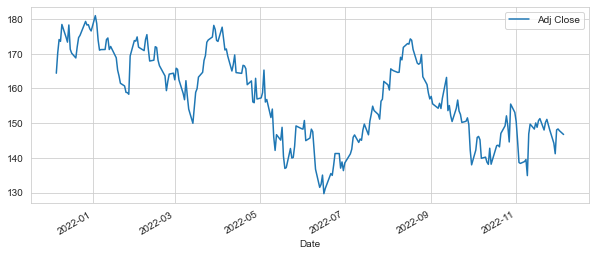

In [15]:
# Plotting Adjusted Closing price for Apple Stock

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

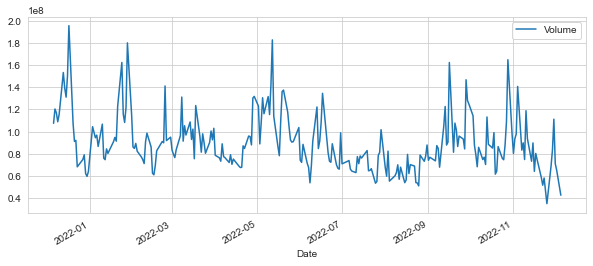

In [16]:

# Plotting the total volume of stock being traded each day

AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [19]:
# Calculating Moving average for 10, 20 and 50 days of the stock price

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()
    

<AxesSubplot:xlabel='Date'>

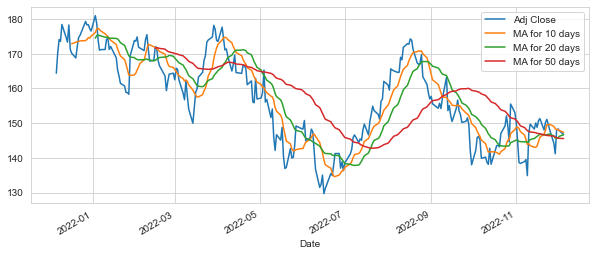

In [20]:

# Plotting the moving averages

AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

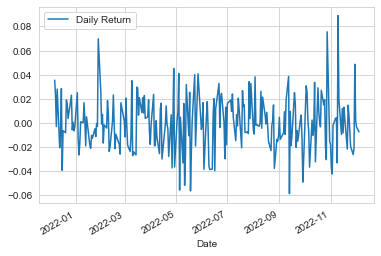

In [21]:

# Plotting Daily returns as a function of Percent change in Adjusted Close value

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True)

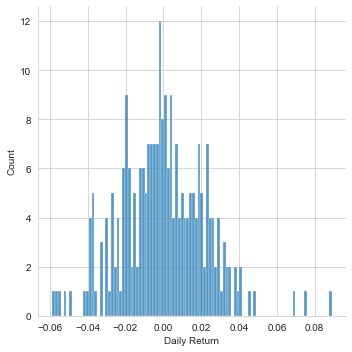

In [23]:
# Plotting the average daily returns of the stock

sns.displot(AAPL['Daily Return'].dropna(),bins=100)

In [24]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

AAPL['Daily Return'].quantile(0.05)

-0.03731651824364818

In [26]:

## Monte Carlo Simulation

rets = AAPL['Daily Return'].dropna()
days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [27]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price


In [28]:

AAPL.head()


,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-12-06,167.880005,164.279999,164.289993,165.320007,107497000.0,164.366074,NaN,NaN,NaN,NaN
2021-12-07,171.580002,168.339996,169.080002,171.179993,120405400.0,170.192230,NaN,NaN,NaN,0.035446
2021-12-08,175.960007,170.699997,172.130005,175.080002,116998900.0,174.069733,NaN,NaN,NaN,0.022783
2021-12-09,176.750000,173.919998,174.910004,174.559998,108923700.0,173.552734,NaN,NaN,NaN,-0.002970
2021-12-10,179.630005,174.690002,175.210007,179.449997,115402700.0,178.414536,NaN,NaN,NaN,0.028013


Text(0.5, 1.0, 'Monte Carlo Simulation for Apple')

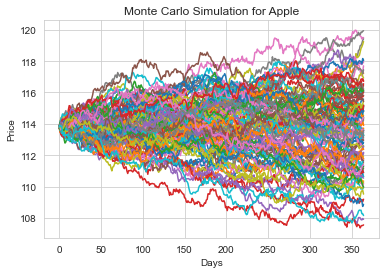

In [29]:
# Running the Monte Carlo simulation a hundred times

start_price = 113.790001

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Apple')